# **Machine Learning Algorithms - Test 1 - Original Features**

## **Uploading the dataset**
---

In [1]:
import pandas as pd

pd.set_option("display.max_columns", None) # display all columns

premier_df = pd.read_csv('C:/Users/Christos/Desktop/Project/Dataset/final_premier_league_dataset.csv')

print("Dataset Dimensions:", premier_df.shape , "\n")

Dataset Dimensions: (3500, 148) 



In [2]:
premier_df.head()

,match_id,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,home_touches,home_yellow_cards,away_clearances,away_corners,away_fouls_conceded,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,goal_home_ft,goal_away_ft,sg_match_ft,goal_home_ht,goal_away_ht,sg_match_ht,clearances_avg_H,corners_avg_H,fouls_conceded_avg_H,offsides_avg_H,passes_avg_H,possession_avg_H,red_cards_avg_H,shots_avg_H,shots_on_target_avg_H,tackles_avg_H,touches_avg_H,yellow_cards_avg_H,goals_scored_ft_avg_H,goals_conced_ft_avg_H,sg_match_ft_acum_H,goals_scored_ht_avg_H,goals_conced_ht_avg_H,sg_match_ht_acum_H,performance_acum_H,clearances_avg_A,corners_avg_A,fouls_conceded_avg_A,offsides_avg_A,passes_avg_A,possession_avg_A,red_cards_avg_A,shots_avg_A,shots_on_target_avg_A,tackles_avg_A,touches_avg_A,yellow_cards_avg_A,goals_scored_ft_avg_A,goals_conced_ft_avg_A,sg_match_ft_acum_A,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,shots_avg_home,shots_on_target_avg_home,tackles_avg_home,touches_avg_home,yellow_cards_avg_home,goals_scored_ft_avg_home,goals_conced_ft_avg_home,sg_match_ft_acum_home,goals_scored_ht_avg_home,goals_conced_ht_avg_home,sg_match_ht_acum_home,performance_acum_home,clearances_avg_away,corners_avg_away,fouls_conceded_avg_away,offsides_avg_away,passes_avg_away,possession_avg_away,red_cards_avg_away,shots_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_att_rating,home_mid_rating,home_def_rating,home_ovr_rating,away_att_rating,away_mid_rating,away_def_rating,away_ovr_rating,home_win_streak,home_draw_streak,home_lose_streak,away_win_streak,away_draw_streak,away_lose_streak,home_points_acum,away_points_acum,home_team_total_points_acum,away_team_total_points_acum,point_difference,home_goals_acum,home_goals_against_acum,away_goals_acum,away_goals_against_acum,home_team_total_goals_acum,away_team_total_goals_acum,goal_difference,home_team_total_goals_against_acum,away_team_total_goals_against_acum,goal_against_difference,home_team_form_last_3,away_team_form_last_3,home_team_form_last_6,away_team_form_last_6,game_result
0,31,https://www.premierleague.com/match/7117,10/11,2010-09-11,Arsenal,Bolton Wanderers,4-1,1-1,34.0,9.0,11.0,5.0,571.0,64.3,0.0,22.0,11.0,18.0,803.0,2.0,15.0,7.0,11.0,1.0,299.0,35.7,1.0,9.0,4.0,39.0,491.0,2.0,4.0,1.0,3.0,1.0,1.0,0.0,13.0,8.0,10.0,4.0,581.0,53.3,0.0,30.0,12.0,14.0,801.0,0.0,6.0,0.0,6.0,3.0,0.0,3.0,100.0,43.0,5.0,17.0,0.0,360.0,49.8,0.0,13.0,5.0,29.0,580.0,4.0,3.0,1.0,2.0,0.0,0.0,0.0,100.0,31.7,9.0,11.0,2.3,548.0,60.4,0.3,20.3,6.7,20.3,781.0,0.7,3.00,0.67,7.0,1.33,0.33,3.0,77.8,50.7,5.0,16.0,1.7,340.3,49.0,0.3,13.0,5.0,26.3,573.0,2.3,1.67,1.00,2.0,0.00,0.33,-1.0,55.6,84,84,80,81,74,75,75,76,1,0,0,1,0,0,3,3,7,5,-2,6,0,3,1,9,5,-4,2,3,1,6.4,4.0,7.4,5.0,H
1,32,https://www.premierleague.com/match/7118,10/11,2010-09-11,Everton,Manchester United,3-3,1-1,20.0,7.0,12.0,2.0,441.0,52.3,0.0,26.0,6.0,16.0,638.0,1.0,47.0,5.0,19.0,5.0,406.0,47.7,0.0,13.0,6.0,20.0,606.0,1.0,3.0,3.0,0.0,1.0,1.0,0.0,32.0,3.0,17.0,3.0,421.0,59.3,0.0,14.0,2.0,16.0,630.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,33.3,25.0,10.0,7.0,2.0,564.0,57.2,0.0,22.0,8.0,6.0,776.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,33.3,33.0,8.0,14.3,1.7,469.0,65.7,0.0,19.0,3.7,14.3,697.7,0.7,0.33,1.00,-2.0,0.33,0.67,-1.0,11.1,19.3,8.0,7.3,2.3,584.3,61.0,0.0,20.7,6.3,20.0,793.3,1.7,2.67,0.67,6.0,1.33,0.00,4.0,77.8,80,79,78,78,85,82,82,82,0,1,0,0,1,0,1,1,1,7,6,1,1,2,2,1,8,7,3,2,-1,0.8,5.

In [3]:
print("Types of dataset features:")
premier_df.dtypes.value_counts()

Types of dataset features:


float64    110
int64       30
object       8
dtype: int64

## **Removing unnecessary features**
---

In [4]:
# features that indicate the winner of each row
premier_df.drop(['match_id', 'link_match', 'home_team', 'away_team', 'date', 'result_full', 'result_ht', 'goal_home_ft',
                 'goal_away_ft', 'goal_home_ht', 'goal_away_ht', 'sg_match_ft', 'sg_match_ht'], axis=1, inplace=True)

premier_df.head()

,season,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,home_touches,home_yellow_cards,away_clearances,away_corners,away_fouls_conceded,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,clearances_avg_H,corners_avg_H,fouls_conceded_avg_H,offsides_avg_H,passes_avg_H,possession_avg_H,red_cards_avg_H,shots_avg_H,shots_on_target_avg_H,tackles_avg_H,touches_avg_H,yellow_cards_avg_H,goals_scored_ft_avg_H,goals_conced_ft_avg_H,sg_match_ft_acum_H,goals_scored_ht_avg_H,goals_conced_ht_avg_H,sg_match_ht_acum_H,performance_acum_H,clearances_avg_A,corners_avg_A,fouls_conceded_avg_A,offsides_avg_A,passes_avg_A,possession_avg_A,red_cards_avg_A,shots_avg_A,shots_on_target_avg_A,tackles_avg_A,touches_avg_A,yellow_cards_avg_A,goals_scored_ft_avg_A,goals_conced_ft_avg_A,sg_match_ft_acum_A,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,shots_avg_home,shots_on_target_avg_home,tackles_avg_home,touches_avg_home,yellow_cards_avg_home,goals_scored_ft_avg_home,goals_conced_ft_avg_home,sg_match_ft_acum_home,goals_scored_ht_avg_home,goals_conced_ht_avg_home,sg_match_ht_acum_home,performance_acum_home,clearances_avg_away,corners_avg_away,fouls_conceded_avg_away,offsides_avg_away,passes_avg_away,possession_avg_away,red_cards_avg_away,shots_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_att_rating,home_mid_rating,home_def_rating,home_ovr_rating,away_att_rating,away_mid_rating,away_def_rating,away_ovr_rating,home_win_streak,home_draw_streak,home_lose_streak,away_win_streak,away_draw_streak,away_lose_streak,home_points_acum,away_points_acum,home_team_total_points_acum,away_team_total_points_acum,point_difference,home_goals_acum,home_goals_against_acum,away_goals_acum,away_goals_against_acum,home_team_total_goals_acum,away_team_total_goals_acum,goal_difference,home_team_total_goals_against_acum,away_team_total_goals_against_acum,goal_against_difference,home_team_form_last_3,away_team_form_last_3,home_team_form_last_6,away_team_form_last_6,game_result
0,10/11,34.0,9.0,11.0,5.0,571.0,64.3,0.0,22.0,11.0,18.0,803.0,2.0,15.0,7.0,11.0,1.0,299.0,35.7,1.0,9.0,4.0,39.0,491.0,2.0,13.0,8.0,10.0,4.0,581.0,53.3,0.0,30.0,12.0,14.0,801.0,0.0,6.0,0.0,6.0,3.0,0.0,3.0,100.0,43.0,5.0,17.0,0.0,360.0,49.8,0.0,13.0,5.0,29.0,580.0,4.0,3.0,1.0,2.0,0.0,0.0,0.0,100.0,31.7,9.0,11.0,2.3,548.0,60.4,0.3,20.3,6.7,20.3,781.0,0.7,3.00,0.67,7.0,1.33,0.33,3.0,77.8,50.7,5.0,16.0,1.7,340.3,49.0,0.3,13.0,5.0,26.3,573.0,2.3,1.67,1.00,2.0,0.00,0.33,-1.0,55.6,84,84,80,81,74,75,75,76,1,0,0,1,0,0,3,3,7,5,-2,6,0,3,1,9,5,-4,2,3,1,6.4,4.0,7.4,5.0,H
1,10/11,20.0,7.0,12.0,2.0,441.0,52.3,0.0,26.0,6.0,16.0,638.0,1.0,47.0,5.0,19.0,5.0,406.0,47.7,0.0,13.0,6.0,20.0,606.0,1.0,32.0,3.0,17.0,3.0,421.0,59.3,0.0,14.0,2.0,16.0,630.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,33.3,25.0,10.0,7.0,2.0,564.0,57.2,0.0,22.0,8.0,6.0,776.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,33.3,33.0,8.0,14.3,1.7,469.0,65.7,0.0,19.0,3.7,14.3,697.7,0.7,0.33,1.00,-2.0,0.33,0.67,-1.0,11.1,19.3,8.0,7.3,2.3,584.3,61.0,0.0,20.7,6.3,20.0,793.3,1.7,2.67,0.67,6.0,1.33,0.00,4.0,77.8,80,79,78,78,85,82,82,82,0,1,0,0,1,0,1,1,1,7,6,1,1,2,2,1,8,7,3,2,-1,0.8,5.6,1.0,7.0,D
2,10/11,43.0,6.0,9.0,6.0,570.0,61.3,0.0,17.0,3.0,17.0,780.0,3.0,51.0,6.0,19.0,2.0,348.0,38.7,1.0,7.0,2.0,17.0,561.0,5.0,38.0,5.0,10.0,0.0,410.0,42.8,0.0,20.0,8.0,14.0,629.0,2.0,2.0,2.0,0.0,0.0,1.0,-1.0,33.3,39.0,3.0,16.0,0.0,298.0,40.7,0.0,10.0,2.0,20.0,471.0,2.0,1.0,1.0,0.0,0.0,1.0,-1.0,33.3,46.7,6.0,13.3,3.3,402.0,47.4,0.0,16.0,5.7,16.3,631.3,1.7,1.33,

## **Identify NaN values & replace them with the mean of each column**
---

In [5]:
count = 0
for column in premier_df.isna().sum():
    count += column

print(count, "NaN values exist within the dataset.")

76 NaN values exist within the dataset.


In [6]:
column_means = premier_df.mean()
premier_df.fillna(column_means, inplace=True)

print("Are there any NaN values in the dataset?")
print(premier_df.isnull().values.any())

Are there any NaN values in the dataset?
False


## **Labelling Target Variable *Game Result***
---

In [7]:
print('Before Labelling:')
premier_df['game_result']

Before Labelling:


0       H
1       D
2       H
3       D
4       A
       ..
3495    A
3496    H
3497    A
3498    H
3499    D
Name: game_result, Length: 3500, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

premier_df['game_result'] = labelencoder.fit_transform(premier_df['game_result'])

In [9]:
print('Definitions: \nH -> 2 \nD -> 1 \nA -> 0')
print('\nAfter Labelling:')
premier_df['game_result']

Definitions: 
H -> 2 
D -> 1 
A -> 0

After Labelling:


0       2
1       1
2       2
3       1
4       0
       ..
3495    0
3496    2
3497    0
3498    2
3499    1
Name: game_result, Length: 3500, dtype: int32

## **Removing Engineered Features**
---

In [10]:
# separating game_result feature to add it later
game_result_df = premier_df['game_result']
# slicing the dataframe
premier_df = premier_df.loc[:, 'season':'performance_acum_away']
premier_df = pd.concat([premier_df, game_result_df], axis=1)
premier_df.head()

,season,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,home_touches,home_yellow_cards,away_clearances,away_corners,away_fouls_conceded,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,clearances_avg_H,corners_avg_H,fouls_conceded_avg_H,offsides_avg_H,passes_avg_H,possession_avg_H,red_cards_avg_H,shots_avg_H,shots_on_target_avg_H,tackles_avg_H,touches_avg_H,yellow_cards_avg_H,goals_scored_ft_avg_H,goals_conced_ft_avg_H,sg_match_ft_acum_H,goals_scored_ht_avg_H,goals_conced_ht_avg_H,sg_match_ht_acum_H,performance_acum_H,clearances_avg_A,corners_avg_A,fouls_conceded_avg_A,offsides_avg_A,passes_avg_A,possession_avg_A,red_cards_avg_A,shots_avg_A,shots_on_target_avg_A,tackles_avg_A,touches_avg_A,yellow_cards_avg_A,goals_scored_ft_avg_A,goals_conced_ft_avg_A,sg_match_ft_acum_A,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,shots_avg_home,shots_on_target_avg_home,tackles_avg_home,touches_avg_home,yellow_cards_avg_home,goals_scored_ft_avg_home,goals_conced_ft_avg_home,sg_match_ft_acum_home,goals_scored_ht_avg_home,goals_conced_ht_avg_home,sg_match_ht_acum_home,performance_acum_home,clearances_avg_away,corners_avg_away,fouls_conceded_avg_away,offsides_avg_away,passes_avg_away,possession_avg_away,red_cards_avg_away,shots_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,game_result
0,10/11,34.0,9.0,11.0,5.0,571.0,64.3,0.0,22.0,11.0,18.0,803.0,2.0,15.0,7.0,11.0,1.0,299.0,35.7,1.0,9.0,4.0,39.0,491.0,2.0,13.0,8.0,10.0,4.0,581.0,53.3,0.0,30.0,12.0,14.0,801.0,0.0,6.0,0.0,6.0,3.0,0.0,3.0,100.0,43.0,5.0,17.0,0.0,360.0,49.8,0.0,13.0,5.0,29.0,580.0,4.0,3.0,1.0,2.0,0.0,0.0,0.0,100.0,31.7,9.0,11.0,2.3,548.0,60.4,0.3,20.3,6.7,20.3,781.0,0.7,3.00,0.67,7.0,1.33,0.33,3.0,77.8,50.7,5.0,16.0,1.7,340.3,49.0,0.3,13.0,5.0,26.3,573.0,2.3,1.67,1.00,2.0,0.00,0.33,-1.0,55.6,2
1,10/11,20.0,7.0,12.0,2.0,441.0,52.3,0.0,26.0,6.0,16.0,638.0,1.0,47.0,5.0,19.0,5.0,406.0,47.7,0.0,13.0,6.0,20.0,606.0,1.0,32.0,3.0,17.0,3.0,421.0,59.3,0.0,14.0,2.0,16.0,630.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,33.3,25.0,10.0,7.0,2.0,564.0,57.2,0.0,22.0,8.0,6.0,776.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,33.3,33.0,8.0,14.3,1.7,469.0,65.7,0.0,19.0,3.7,14.3,697.7,0.7,0.33,1.00,-2.0,0.33,0.67,-1.0,11.1,19.3,8.0,7.3,2.3,584.3,61.0,0.0,20.7,6.3,20.0,793.3,1.7,2.67,0.67,6.0,1.33,0.00,4.0,77.8,1
2,10/11,43.0,6.0,9.0,6.0,570.0,61.3,0.0,17.0,3.0,17.0,780.0,3.0,51.0,6.0,19.0,2.0,348.0,38.7,1.0,7.0,2.0,17.0,561.0,5.0,38.0,5.0,10.0,0.0,410.0,42.8,0.0,20.0,8.0,14.0,629.0,2.0,2.0,2.0,0.0,0.0,1.0,-1.0,33.3,39.0,3.0,16.0,0.0,298.0,40.7,0.0,10.0,2.0,20.0,471.0,2.0,1.0,1.0,0.0,0.0,1.0,-1.0,33.3,46.7,6.0,13.3,3.3,402.0,47.4,0.0,16.0,5.7,16.3,631.3,1.7,1.33,1.33,0.0,0.33,0.33,0.0,33.3,40.0,4.3,18.3,1.0,317.7,49.0,0.0,10.3,2.3,19.7,506.7,3.0,1.33,1.00,1.0,1.00,0.33,2.0,55.6,2
3,10/11,38.0,13.0,15.0,2.0,512.0,64.9,0.0,21.0,10.0,12.0,768.0,2.0,39.0,1.0,12.0,0.0,282.0,35.1,0.0,9.0,3.0,33.0,493.0,1.0,24.0,5.0,13.0,1.0,492.0,54.4,0.0,12.0,3.0,30.0,690.0,1.0,3.0,0.0,3.0,1.0,0.0,1.0,100.0,52.0,12.0,14.0,2.0,253.0,44.0,0.0,15.0,4.0,17.0,485.0,3.0,1.0,2.0,-1.0,0.0,0.0,0.0,0.0,29.0,5.0,13.0,1.0,558.7,57.8,0.0,12.0,2.3,29.0,783.7,2.0,1.00,0.33,2.0,0.33,0.00,1.0,44.4,44.0,5.7,14.3,3.3,247.3,36.6,0.0,12.3,3.0,19.3,478.7,2.0,1.00,1.33,-1.0,0.67,0.33,1.0,33.3,1
4,10/11,17.0,3.0,16.0,4.0,396.0,56.5,0.0,21.0,7.0,8.0,597.0,2.0,52.0,2.0,17.0,11.0,311.0,43.5,0.0,8.0,5.0,11.0,511.0,3.0,18.0,9.0,15.0,1.0,380.0,50.1,0.0,17.0,11.0,19.0,571.0,3.0,6.0,0.0,6.0,3.0,0.0,3.0,100.0,29.0,3.0,8.5,3.5,421.0,45

## **Splitting the dataset**
---

In [11]:
pd.options.mode.chained_assignment = None

X_train = premier_df[premier_df['season'] != '19/20']
X_train.drop(['season'], axis=1, inplace=True)

X_train

,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,home_touches,home_yellow_cards,away_clearances,away_corners,away_fouls_conceded,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,clearances_avg_H,corners_avg_H,fouls_conceded_avg_H,offsides_avg_H,passes_avg_H,possession_avg_H,red_cards_avg_H,shots_avg_H,shots_on_target_avg_H,tackles_avg_H,touches_avg_H,yellow_cards_avg_H,goals_scored_ft_avg_H,goals_conced_ft_avg_H,sg_match_ft_acum_H,goals_scored_ht_avg_H,goals_conced_ht_avg_H,sg_match_ht_acum_H,performance_acum_H,clearances_avg_A,corners_avg_A,fouls_conceded_avg_A,offsides_avg_A,passes_avg_A,possession_avg_A,red_cards_avg_A,shots_avg_A,shots_on_target_avg_A,tackles_avg_A,touches_avg_A,yellow_cards_avg_A,goals_scored_ft_avg_A,goals_conced_ft_avg_A,sg_match_ft_acum_A,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,shots_avg_home,shots_on_target_avg_home,tackles_avg_home,touches_avg_home,yellow_cards_avg_home,goals_scored_ft_avg_home,goals_conced_ft_avg_home,sg_match_ft_acum_home,goals_scored_ht_avg_home,goals_conced_ht_avg_home,sg_match_ht_acum_home,performance_acum_home,clearances_avg_away,corners_avg_away,fouls_conceded_avg_away,offsides_avg_away,passes_avg_away,possession_avg_away,red_cards_avg_away,shots_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,game_result
0,34.0,9.0,11.0,5.0,571.0,64.3,0.0,22.0,11.0,18.0,803.0,2.0,15.0,7.0,11.0,1.0,299.0,35.7,1.0,9.0,4.0,39.0,491.0,2.0,13.0,8.0,10.0,4.0,581.0,53.3,0.0,30.0,12.0,14.0,801.0,0.0,6.00,0.00,6.0,3.00,0.00,3.0,100.0,43.0,5.0,17.0,0.0,360.0,49.8,0.0,13.0,5.0,29.0,580.0,4.0,3.00,1.00,2.0,0.00,0.00,0.0,100.0,31.7,9.0,11.0,2.3,548.0,60.4,0.3,20.3,6.7,20.3,781.0,0.7,3.00,0.67,7.0,1.33,0.33,3.0,77.8,50.7,5.0,16.0,1.7,340.3,49.0,0.3,13.0,5.0,26.3,573.0,2.3,1.67,1.00,2.0,0.00,0.33,-1.0,55.6,2
1,20.0,7.0,12.0,2.0,441.0,52.3,0.0,26.0,6.0,16.0,638.0,1.0,47.0,5.0,19.0,5.0,406.0,47.7,0.0,13.0,6.0,20.0,606.0,1.0,32.0,3.0,17.0,3.0,421.0,59.3,0.0,14.0,2.0,16.0,630.0,1.0,1.00,1.00,0.0,1.00,0.00,1.0,33.3,25.0,10.0,7.0,2.0,564.0,57.2,0.0,22.0,8.0,6.0,776.0,2.0,2.00,2.00,0.0,1.00,0.00,1.0,33.3,33.0,8.0,14.3,1.7,469.0,65.7,0.0,19.0,3.7,14.3,697.7,0.7,0.33,1.00,-2.0,0.33,0.67,-1.0,11.1,19.3,8.0,7.3,2.3,584.3,61.0,0.0,20.7,6.3,20.0,793.3,1.7,2.67,0.67,6.0,1.33,0.00,4.0,77.8,1
2,43.0,6.0,9.0,6.0,570.0,61.3,0.0,17.0,3.0,17.0,780.0,3.0,51.0,6.0,19.0,2.0,348.0,38.7,1.0,7.0,2.0,17.0,561.0,5.0,38.0,5.0,10.0,0.0,410.0,42.8,0.0,20.0,8.0,14.0,629.0,2.0,2.00,2.00,0.0,0.00,1.00,-1.0,33.3,39.0,3.0,16.0,0.0,298.0,40.7,0.0,10.0,2.0,20.0,471.0,2.0,1.00,1.00,0.0,0.00,1.00,-1.0,33.3,46.7,6.0,13.3,3.3,402.0,47.4,0.0,16.0,5.7,16.3,631.3,1.7,1.33,1.33,0.0,0.33,0.33,0.0,33.3,40.0,4.3,18.3,1.0,317.7,49.0,0.0,10.3,2.3,19.7,506.7,3.0,1.33,1.00,1.0,1.00,0.33,2.0,55.6,2
3,38.0,13.0,15.0,2.0,512.0,64.9,0.0,21.0,10.0,12.0,768.0,2.0,39.0,1.0,12.0,0.0,282.0,35.1,0.0,9.0,3.0,33.0,493.0,1.0,24.0,5.0,13.0,1.0,492.0,54.4,0.0,12.0,3.0,30.0,690.0,1.0,3.00,0.00,3.0,1.00,0.00,1.0,100.0,52.0,12.0,14.0,2.0,253.0,44.0,0.0,15.0,4.0,17.0,485.0,3.0,1.00,2.00,-1.0,0.00,0.00,0.0,0.0,29.0,5.0,13.0,1.0,558.7,57.8,0.0,12.0,2.3,29.0,783.7,2.0,1.00,0.33,2.0,0.33,0.00,1.0,44.4,44.0,5.7,14.3,3.3,247.3,36.6,0.0,12.3,3.0,19.3,478.7,2.0,1.00,1.33,-1.0,0.67,0.33,1.0,33.3,1
4,17.0,3.0,16.0,4.0,396.0,56.5,0.0,21.0,7.0,8.0,597.0,2.0,52.0,2.0,17.0,11.0,311.0,43.5,0.0,8.0,5.0,11.0,511.0,3.0,18.0,9.0,15.0,1.0,380.0,50.1,0.0,17.0,11.0,19.0,571.0,3.0,6.00,0.00,6.0,3.00,0.00,3.0,100.0,29.0,3.0,8.5,3.5,421.0,45.

In [12]:
X_test = premier_df[premier_df['season'] == '19/20']
X_test.drop(['season'], axis=1, inplace=True)

X_test

,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,home_touches,home_yellow_cards,away_clearances,away_corners,away_fouls_conceded,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,clearances_avg_H,corners_avg_H,fouls_conceded_avg_H,offsides_avg_H,passes_avg_H,possession_avg_H,red_cards_avg_H,shots_avg_H,shots_on_target_avg_H,tackles_avg_H,touches_avg_H,yellow_cards_avg_H,goals_scored_ft_avg_H,goals_conced_ft_avg_H,sg_match_ft_acum_H,goals_scored_ht_avg_H,goals_conced_ht_avg_H,sg_match_ht_acum_H,performance_acum_H,clearances_avg_A,corners_avg_A,fouls_conceded_avg_A,offsides_avg_A,passes_avg_A,possession_avg_A,red_cards_avg_A,shots_avg_A,shots_on_target_avg_A,tackles_avg_A,touches_avg_A,yellow_cards_avg_A,goals_scored_ft_avg_A,goals_conced_ft_avg_A,sg_match_ft_acum_A,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,shots_avg_home,shots_on_target_avg_home,tackles_avg_home,touches_avg_home,yellow_cards_avg_home,goals_scored_ft_avg_home,goals_conced_ft_avg_home,sg_match_ft_acum_home,goals_scored_ht_avg_home,goals_conced_ht_avg_home,sg_match_ht_acum_home,performance_acum_home,clearances_avg_away,corners_avg_away,fouls_conceded_avg_away,offsides_avg_away,passes_avg_away,possession_avg_away,red_cards_avg_away,shots_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,game_result
3150,21.0,6.0,10.0,5.0,318.0,36.2,0.0,7.0,2.0,14.0,495.0,0.0,19.0,4.0,16.0,1.0,568.0,63.8,0.0,15.0,7.0,11.0,739.0,0.0,13.0,2.0,6.0,5.0,332.0,46.5,0.0,10.0,4.0,21.0,549.0,0.0,3.00,0.00,3.0,0.00,0.00,0.0,100.0,30.0,9.0,6.0,1.0,530.0,63.8,0.0,15.0,6.0,7.0,735.0,1.0,2.00,1.00,1.0,1.00,0.00,1.0,100.0,21.7,4.0,9.3,2.3,290.7,38.0,0.0,13.7,4.3,16.3,488.3,1.0,1.67,1.00,2.0,0.67,0.33,1.0,44.4,15.3,8.7,7.7,0.7,520.0,57.9,0.0,18.3,6.0,17.7,714.7,0.7,3.00,1.00,6.0,2.00,0.00,6.0,100.0,0
3151,15.0,3.0,6.0,2.0,719.0,62.3,0.0,13.0,5.0,16.0,898.0,0.0,24.0,4.0,11.0,0.0,429.0,37.7,0.0,8.0,2.0,15.0,595.0,1.0,23.0,4.0,9.0,3.0,454.0,50.2,0.0,14.0,5.0,25.0,692.0,1.0,1.00,1.00,0.0,1.00,0.00,1.0,33.3,16.0,4.0,19.0,1.0,428.0,47.1,0.0,8.0,3.0,14.0,615.0,1.0,1.00,1.00,0.0,0.00,0.00,0.0,33.3,14.3,5.7,10.3,1.0,506.7,52.5,0.0,18.3,6.7,24.0,729.3,2.0,1.33,2.33,-3.0,1.00,1.00,0.0,44.4,23.0,6.3,15.3,0.7,401.0,46.2,0.0,10.0,2.7,16.7,611.7,1.7,1.00,1.00,0.0,0.00,0.33,-1.0,44.4,1
3152,21.0,13.0,15.0,2.0,407.0,52.8,0.0,22.0,5.0,18.0,614.0,2.0,30.0,2.0,16.0,0.0,379.0,47.2,1.0,10.0,2.0,19.0,591.0,4.0,21.0,6.0,16.0,4.0,268.0,35.4,0.0,6.0,2.0,21.0,467.0,2.0,0.00,0.00,0.0,0.00,0.00,0.0,33.3,39.0,0.0,9.0,0.0,256.0,29.9,0.0,7.0,4.0,29.0,461.0,0.0,1.00,3.00,-2.0,1.00,0.00,1.0,0.0,24.0,3.7,15.0,1.7,332.3,40.5,0.0,5.7,3.0,22.3,531.3,2.3,0.67,0.67,0.0,0.33,0.00,1.0,44.4,26.3,3.3,9.7,4.3,349.0,42.6,0.0,11.7,4.7,16.0,551.0,0.7,1.33,1.67,-1.0,0.67,0.67,0.0,33.3,2
3153,25.0,4.0,9.0,2.0,541.0,55.0,0.0,15.0,6.0,22.0,751.0,1.0,18.0,5.0,11.0,1.0,432.0,45.0,0.0,8.0,2.0,14.0,647.0,3.0,12.0,12.0,3.0,0.0,665.0,70.0,0.0,16.0,1.0,20.0,871.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,33.3,25.0,5.0,13.0,2.0,295.0,37.4,0.0,12.0,4.0,15.0,468.0,2.0,2.00,1.00,1.0,2.00,0.00,2.0,100.0,23.3,7.0,7.7,2.7,524.0,56.9,0.0,12.7,2.0,20.7,743.0,0.0,1.00,0.67,1.0,0.33,0.33,0.0,55.6,20.0,4.0,10.0,1.7,343.0,38.8,0.0,11.7,4.7,13.7,519.3,1.7,1.33,1.67,-1.0,1.00,0.67,1.0,44.4,2
3154,19.0,8.0,10.0,1.0,598.0,53.5,0.0,15.0,6.0,15.0,755.0,1.0,14.0,1.0,6.0,3.0,523.0,46.5,0.0,6.0,2.0,18.0,678.0,1.0,10.0,13.0,14.0,3.0,610.0,55.4,0.0,30.0,10.0,15.0,806.0,1.0,2.00,2.00,0.0,2.00,1.00,1.0,33.3,24.0,2.0,11.0,3.0,442.0,51.8,

In [13]:
y_train = X_train.pop('game_result')
y_test = X_test.pop('game_result')

In [14]:
print("X_train Size:", X_train.shape, "\nX_test Size:", X_test.shape, "\n")
print("y_train Size:", y_train.shape, "\ny_test Size:", y_test.shape)

X_train Size: (3150, 100) 
X_test Size: (350, 100) 

y_train Size: (3150,) 
y_test Size: (350,)


## **Data Normalization**
---

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fit scaler on train & test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Classifiers**
---

> ### **Import Dependencies**

In [16]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from tensorflow import random
from numpy.random import seed
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef
import matplotlib.pyplot as plt 
import seaborn as sns

> ### **Logistic Regression**

C:\Users\Christos\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 68.13 %
Testing Accuracy: 63.43 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.76      0.69       104
           1       0.38      0.12      0.18        84
           2       0.67      0.82      0.74       162

    accuracy                           0.63       350
   macro avg       0.56      0.57      0.54       350
weighted avg       0.59      0.63      0.59       350

MCC: 0.42 


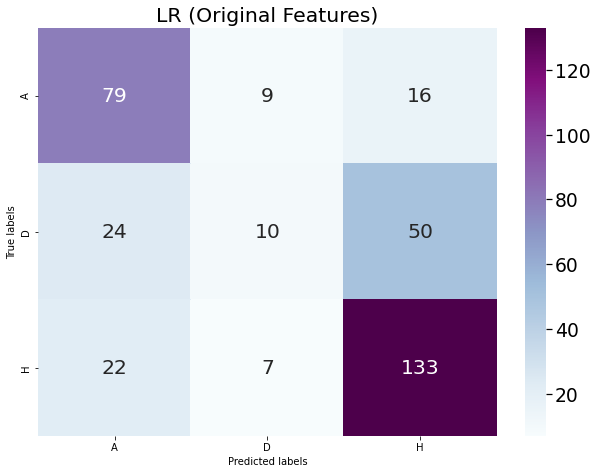

In [17]:
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Training Accuracy: %.2f %%" % (accuracy_score(y_train, model.predict(X_train)) * 100))
print("Testing Accuracy: %.2f %%" % (accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report: \n", report)
print("MCC: %.2f " % (matthews_corrcoef(y_test, y_pred)))

# Plotting the confusion matrix
fig = plt.figure(figsize=(9, 7))
ax = plt.subplot()
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.8})
sns.heatmap(matrix, cmap="BuPu", annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('LR (Original Features)');
ax.xaxis.set_ticklabels(['A', 'D', 'H']); 
ax.yaxis.set_ticklabels(['A', 'D', 'H']);
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/Christos/Desktop/LR.jpeg', dpi=300)

> ### **Random Forest**

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.64      0.61       104
           1       0.18      0.02      0.04        84
           2       0.60      0.83      0.70       162

    accuracy                           0.58       350
   macro avg       0.45      0.50      0.45       350
weighted avg       0.49      0.58      0.51       350

Training Accuracy: 100.00 %
Testing Accuracy: 58.00 %
MCC: 0.32 


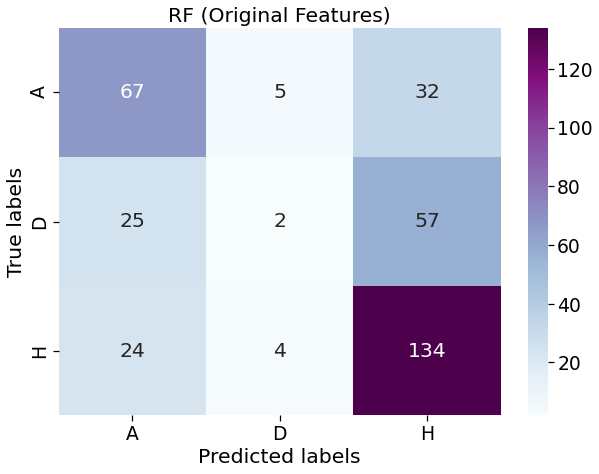

In [23]:
model = RandomForestClassifier(random_state=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report: \n", report)
print("Training Accuracy: %.2f %%" % (accuracy_score(y_train, model.predict(X_train)) * 100))
print("Testing Accuracy: %.2f %%" % (accuracy_score(y_test, y_pred) * 100))
print("MCC: %.2f " % (matthews_corrcoef(y_test, y_pred)))

# Plotting the confusion matrix
fig = plt.figure(figsize=(9, 7))
ax = plt.subplot()
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.8})
sns.heatmap(matrix, cmap="BuPu", annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('RF (Original Features)');
ax.xaxis.set_ticklabels(['A', 'D', 'H']); 
ax.yaxis.set_ticklabels(['A', 'D', 'H']);
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/Christos/Desktop/RF.jpeg', dpi=300)

> ### **Support Vector Machines**

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.71      0.69       104
           1       0.35      0.13      0.19        84
           2       0.67      0.87      0.76       162

    accuracy                           0.65       350
   macro avg       0.57      0.57      0.55       350
weighted avg       0.60      0.65      0.60       350

Training Accuracy: 75.37 %
Testing Accuracy: 64.57 %
MCC: 0.43 


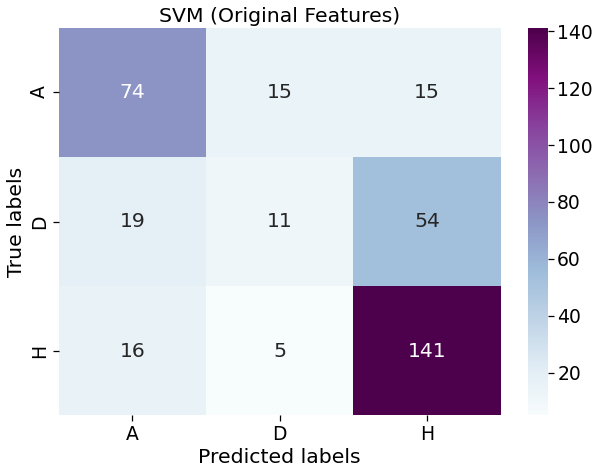

In [24]:
model=SVC(random_state=3) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report: \n", report)
print("Training Accuracy: %.2f %%" % (accuracy_score(y_train, model.predict(X_train)) * 100))
print("Testing Accuracy: %.2f %%" % (accuracy_score(y_test, y_pred) * 100))
print("MCC: %.2f " % (matthews_corrcoef(y_test, y_pred)))

# Plotting the confusion matrix
fig = plt.figure(figsize=(9, 7))
ax = plt.subplot()
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.8})
sns.heatmap(matrix, cmap="BuPu", annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('SVM (Original Features)');
ax.xaxis.set_ticklabels(['A', 'D', 'H']); 
ax.yaxis.set_ticklabels(['A', 'D', 'H']);
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/Christos/Desktop/SVM.jpeg', dpi=300)

> ### **K-Nearest Neighbours**

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.68      0.55       104
           1       0.29      0.18      0.22        84
           2       0.64      0.57      0.60       162

    accuracy                           0.51       350
   macro avg       0.46      0.48      0.46       350
weighted avg       0.50      0.51      0.50       350

Training Accuracy: 68.00 %
Testing Accuracy: 51.14 %
MCC: 0.24 


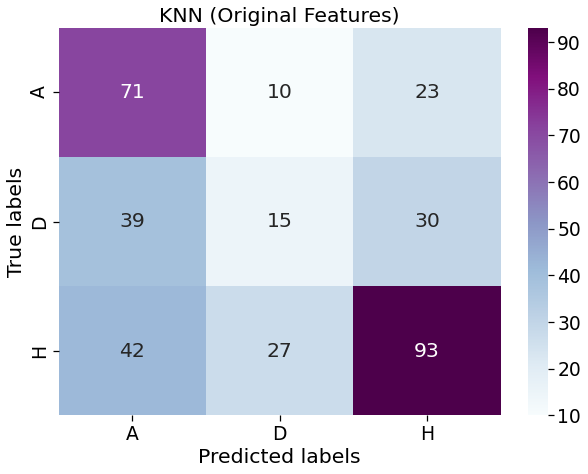

In [25]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report: \n", report)
print("Training Accuracy: %.2f %%" % (accuracy_score(y_train, model.predict(X_train)) * 100))
print("Testing Accuracy: %.2f %%" % (accuracy_score(y_test, y_pred) * 100))
print("MCC: %.2f " % (matthews_corrcoef(y_test, y_pred)))

# Plotting the confusion matrix
fig = plt.figure(figsize=(9, 7))
ax = plt.subplot()
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.8})
sns.heatmap(matrix, cmap="BuPu", annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('KNN (Original Features)');
ax.xaxis.set_ticklabels(['A', 'D', 'H']); 
ax.yaxis.set_ticklabels(['A', 'D', 'H']);
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/Christos/Desktop/KNN.jpeg', dpi=300)

> ### **XGBoost**

C:\Users\Christos\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.64      0.63       104
           1       0.26      0.11      0.15        84
           2       0.65      0.83      0.73       162

    accuracy                           0.60       350
   macro avg       0.51      0.53      0.50       350
weighted avg       0.55      0.60      0.56       350

Training Accuracy: 100.00 %
Testing Accuracy: 60.00 %
MCC: 0.36 


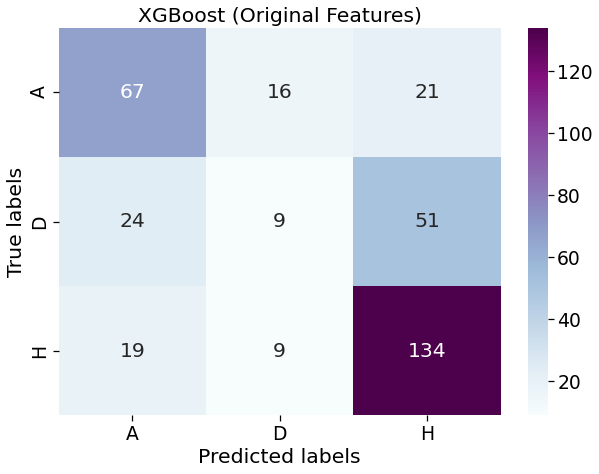

In [26]:
model = XGBClassifier(seed=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report: \n", report)
print("Training Accuracy: %.2f %%" % (accuracy_score(y_train, model.predict(X_train)) * 100))
print("Testing Accuracy: %.2f %%" % (accuracy_score(y_test, y_pred) * 100))
print("MCC: %.2f " % (matthews_corrcoef(y_test, y_pred)))

# Plotting the confusion matrix
fig = plt.figure(figsize=(9, 7))
ax = plt.subplot()
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.8})
sns.heatmap(matrix, cmap="BuPu", annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('XGBoost (Original Features)');
ax.xaxis.set_ticklabels(['A', 'D', 'H']); 
ax.yaxis.set_ticklabels(['A', 'D', 'H']);
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/Christos/Desktop/XGBoost.jpeg', dpi=300)

> ### **Artificial Neural Network**

99/99 [==============================] - 0s 439us/step - loss: 1.0247
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.81      0.54       104
           1       0.00      0.00      0.00        84
           2       0.64      0.55      0.59       162

    accuracy                           0.49       350
   macro avg       0.35      0.45      0.37       350
weighted avg       0.41      0.49      0.43       350

Training Accuracy: 54.32 %
Testing Accuracy: 49.43 %
MCC: 0.24 


C:\Users\Christos\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Christos\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Christos\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

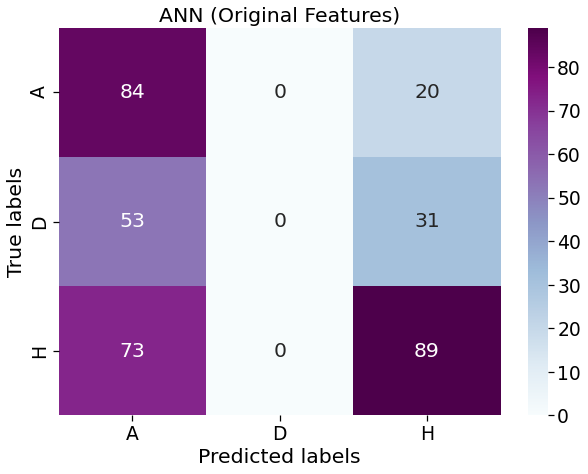

In [27]:
seed(6)
random.set_seed(6)

model = Sequential()
model.add(Dense(60, input_dim=100, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

predictions = np.argmax(y_pred, axis=-1)

# Metrics
matrix = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)
print("Classification Report: \n", report)
print("Training Accuracy: %.2f %%" % (accuracy_score(y_train, np.argmax(model.predict(X_train), axis=-1)) * 100))
print("Testing Accuracy: %.2f %%" % (accuracy_score(y_test, predictions) * 100))
print("MCC: %.2f " % (matthews_corrcoef(y_test, predictions)))

# Plotting the confusion matrix
fig = plt.figure(figsize=(9, 7))
ax = plt.subplot()
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.8})
sns.heatmap(matrix, cmap="BuPu", annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('ANN (Original Features)');
ax.xaxis.set_ticklabels(['A', 'D', 'H']); 
ax.yaxis.set_ticklabels(['A', 'D', 'H']);
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/Christos/Desktop/ANN.jpeg', dpi=300)